# Assignment: Data Manipulation Cont.
### Team Insight
#### <font color='#C70039'> Authors: NOUF ALJOHANI, Amal Almutairi, Salha Nasser, Rawan Alsudias, & Rahaf Alzahrani

In [2]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Note: We can set the style by calling Seaborn's set() method 
sns.set_style('darkgrid')
#sns.set() #default
palette_color = sns.color_palette('pastel')

### Load Dataset and Explore it

In [3]:
PATH_URL= "hotel_bookings.csv"



# Pass in col_ls into names parameter to explicitly name each column
df_hotel= pd.read_csv(PATH_URL)
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df_hotel.shape

(119390, 32)

In [5]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df_hotel.describe(exclude='number')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [8]:
df_hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df_hotel['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [10]:
df_hotel['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [11]:
df = df_hotel.drop(labels=['company', 'agent'], axis=1)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [12]:
df.shape

(119390, 30)

In [13]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [14]:
df = df.dropna(axis = 'index', how = 'any')

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
# add column to use later.
df['total_guests'] = df['adults'] + df['babies'] + df['children']
df['arrival_date'] = df['arrival_date_year'].astype(str) + ' ' + df['arrival_date_month'] + ' ' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])


/var/folders/mg/0n3_ykv136l33bpg6zflct_c0000gn/T/ipykernel_32612/3917875493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_guests'] = df['adults'] + df['babies'] + df['children']
/var/folders/mg/0n3_ykv136l33bpg6zflct_c0000gn/T/ipykernel_32612/3917875493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_date'] = df['arrival_date_year'].astype(str) + ' ' + df['arrival_date_month'] + ' ' + df['arrival_date_day_of_month'].astype(str)
/var/folders/mg/0n3_ykv136l33bpg6zflct_c0000gn/T

In [17]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests
is_canceled,1.000000,0.291994,0.016412,0.007465,-0.006127,-0.002631,0.024110,0.058381,0.004751,-0.032521,-0.085179,0.109922,-0.055493,-0.144659,0.054016,0.046199,-0.194796,-0.235643,0.045031
lead_time,0.291994,1.000000,0.039924,0.126738,0.002320,0.083984,0.164783,0.116799,-0.038335,-0.021149,-0.125091,0.085961,-0.071128,0.000004,0.170007,-0.066381,-0.115561,-0.096536,0.069561
arrival_date_year,0.016412,0.039924,1.000000,-0.540493,-0.000590,0.021669,0.031754,0.029146,0.054492,-0.013183,0.010128,-0.119922,0.029800,0.031124,-0.056823,0.197857,-0.012661,0.108927,0.051713
arrival_date_week_number,0.007465,0.126738,-0.540493,1.000000,0.066839,0.017642,0.015007,0.025394,0.005494,0.010039,-0.030411,0.035367,-0.020768,0.005187,0.022993,0.075277,0.001717,0.025778,0.024745
arrival_date_day_of_month,-0.006127,0.002320,-0.000590,0.066839,1.000000,-0.015920,-0.027608,-0.001837,0.014562,-0.000539,-0.006340,-0.027013,0.000118,0.010767,0.022737,0.029923,0.008262,0.003082,0.006507
stays_in_weekend_nights,-0.002631,0.083984,0.021669,0.017642,-0.015920,1.000000,0.494888,0.090410,0.045430,0.018396,-0.087836,-0.013008,-0.040597,0.062401,-0.054568,0.047300,-0.018147,0.071669,0.100063
stays_in_week_nights,0.024110,0.164783,0.031754,0.015007,-0.027608,0.494888,1.000000,0.091999,0.044259,0.020157,-0.097994,-0.014274,-0.047367,0.095665,-0.002161,0.063628,-0.024378,0.066785,0.100927
adults,0.058381,0.116799,0.029146,0.025394,-0.001837,0.090410,0.091999,1.000000,0.029590,0.017887,-0.147494,-0.006974,-0.105028,-0.052420,-0.008765,0.227480,0.016370,0.121815,0.820244
children,0.004751,-0.038335,0.054492,0.005494,0.014562,0.045430,0.044259,0.029590,1.000000,0.024131,-0.032990,-0.024752,-0.020364,0.048660,-0.033396,0.325034,0.057060,0.081786,0.579923
babies,-0.032521,-0.021149,-0.013183,0.010039,-0.000539,0.018396,0.020157,0.017887,0.024131,1.000000,-0.008954,-0.007489,-0.006306,0.083220,-0.010648,0.028591,0.036971,0.097601,0.162574


## Graphs

### #1. Graph 

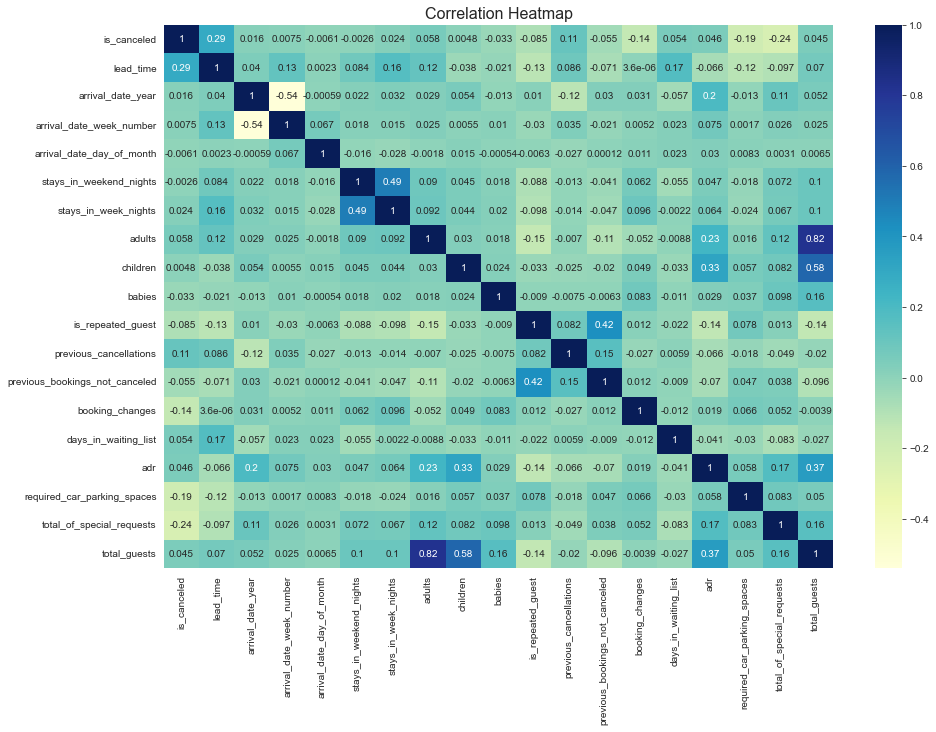

In [18]:
# Set the width and height of the figure
plt.figure(figsize=(15,10))
# Add title
plt.title("Correlation Heatmap", size=16)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
#plt.savefig("corr_heatmap.png", format="png", dpi=1200)
plt.show()

### #2. Graph 

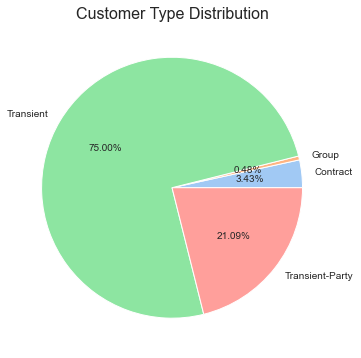

In [19]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Customer Type Distribution", size=16)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
data= df.groupby(['customer_type']).size()
labels = data.keys()
# plotting data on chart
plt.pie(data, labels=labels, colors=palette_color, autopct='%.2f%%')
#plt.savefig("customer_type_dist.png", format="png", dpi=1200)
plt.show()

### #3. Graph 

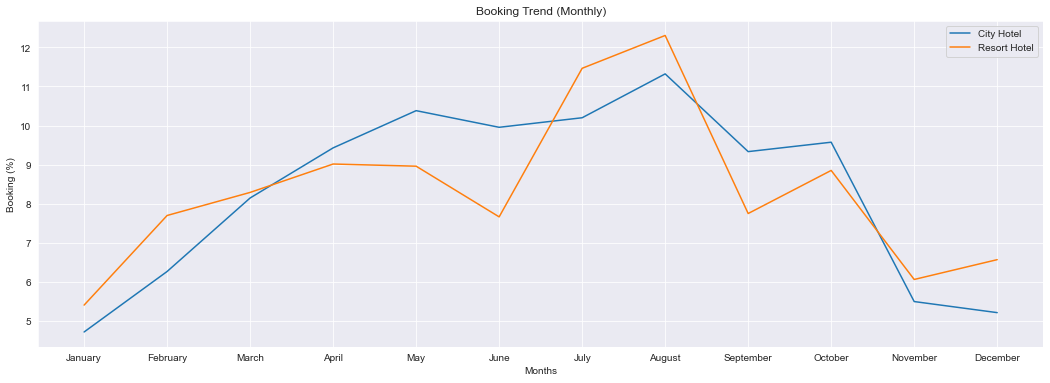

In [20]:
# Set the width and height of the figure
sns.lineplot## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']


## Select only City Hotel
sorted_months = df.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = df.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100


## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x=x1, y=y1.values, label='City Hotel', sort=False)
sns.lineplot(x=x1, y=y2.values, label='Resort Hotel', sort=False)

#plt.savefig("Booking_trend_monthly.png", format="png", dpi=1200)

plt.show()


### #4. Graph

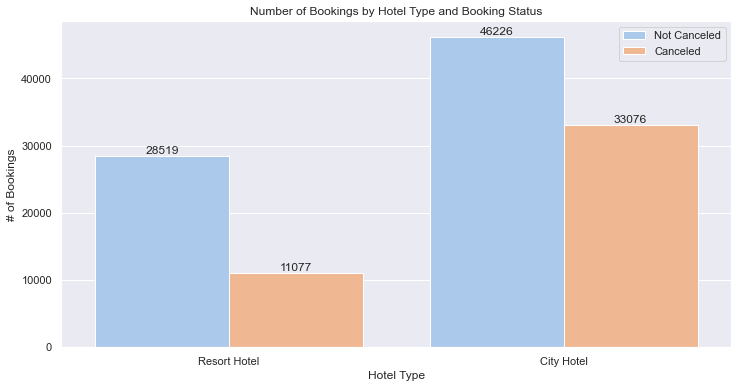

In [28]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))

sns.set(rc={'figure.figsize':(12,6)})
graph = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=palette_color)
graph.set(title='Number of Bookings by Hotel Type and Booking Status')
graph.set_xlabel('Hotel Type', fontsize = 12)
graph.set_ylabel('# of Bookings', fontsize = 12)
plt.legend(['Not Canceled' , 'Canceled'])
for container in graph.containers:
    graph.bar_label(container)
#plt.savefig("bookings_number_by_hotel_status.png", format="png", dpi=1200)
plt.show()



**It clearly  that city hotel have more cancellation rate than the resort hotels 

In [40]:
(df[df['is_canceled'] == 1]['hotel'].value_counts().values / df['hotel'].value_counts().values )*100

array([41.70891024, 27.97504798])

City Hotel      33076
Resort Hotel    11077
Name: hotel, dtype: int64

### #5. Graph

In [22]:
countries = pd.Series(df.country.value_counts()).reset_index()
#countries[0:15]

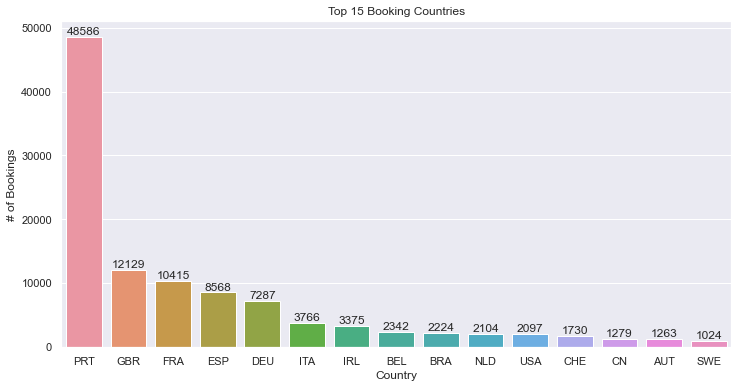

In [23]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))

# Add title
plt.title("Top 15 Booking Countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
g = sns.barplot(data= df, x=countries[0:15].index, y=countries[0:15].country)

g.set_xticklabels(countries[0:15]['index'].values)

# Add label for vertical axis
plt.ylabel("# of Bookings")

# Add label for horizontal axis
plt.xlabel("Country")
for container in g.containers:
    g.bar_label(container)
#plt.savefig("top15_countries.png", format="png", dpi=1200)
plt.show()

### #6. Graph

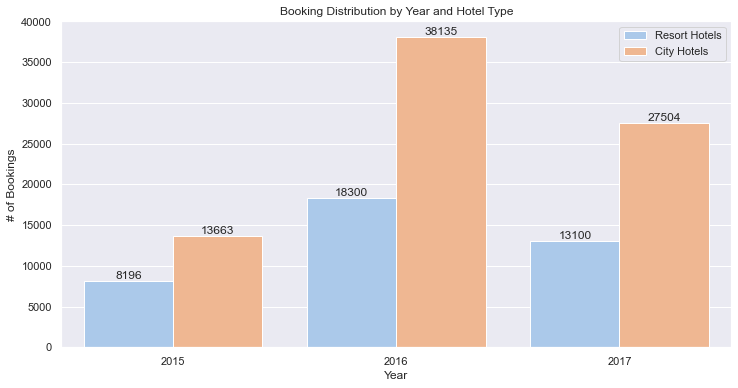

In [24]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))

# Add title
plt.title("Booking Distribution by Year and Hotel Type")
sns.set(rc={'figure.figsize':(14,12)})
ax = sns.countplot(x='arrival_date_year',hue='hotel', data=df, palette=palette_color)
plt.xlabel('Year')
plt.ylabel('# of Bookings')
plt.legend(labels=["Resort Hotels","City Hotels"])
for container in ax.containers:
    ax.bar_label(container)
    
#plt.savefig("booking_dist_by_year_hotel.png", format="png", dpi=1200)
plt.show()

### #7. Graph

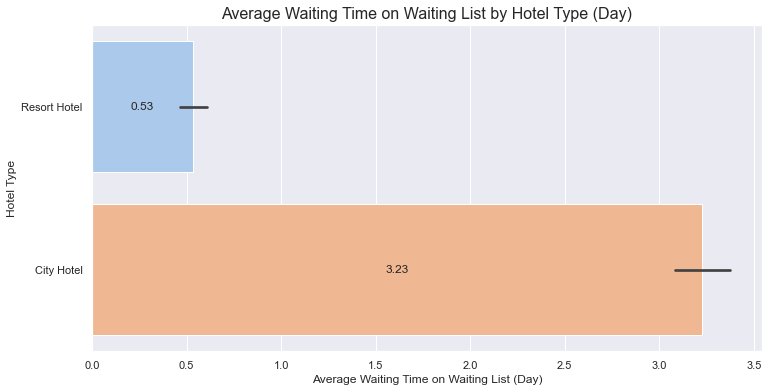

In [24]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))

# Add title
plt.title("Average Waiting Time on Waiting List by Hotel Type (Day)", size=16)

# Bar chart showing average wokring hours by work class
ax = sns.barplot(x='days_in_waiting_list', y='hotel', data=df, palette=palette_color)

# Add label for vertical and horizantal axis
plt.ylabel("Hotel Type")
plt.xlabel("Average Waiting Time on Waiting List (Day)")
ax.bar_label(ax.containers[0], fmt="%.2f", label_type='center') # needs changing
#plt.savefig("avg_days_waiting_list.png", format="png", dpi=1200)
plt.show()

### #8. Graph

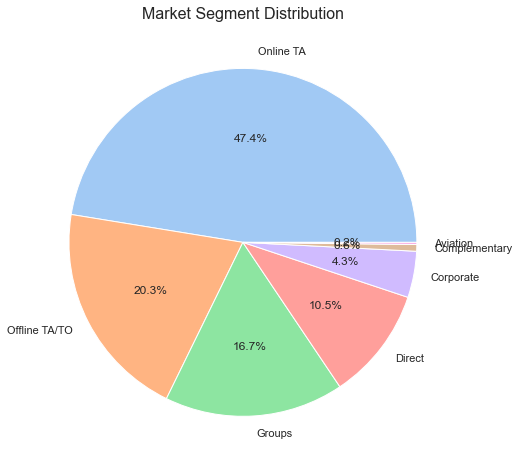

In [25]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))

# Add title
plt.title("Market Segment Distribution", size=16)

df3 = pd.DataFrame(df['market_segment'].value_counts().reset_index())

plt.pie(data=df3,x='market_segment',labels='index', autopct='%.1f%%', colors=palette_color)

#plt.savefig("market_seg_dist.png", format="png", dpi=1200)

plt.show()


### #9 Graph

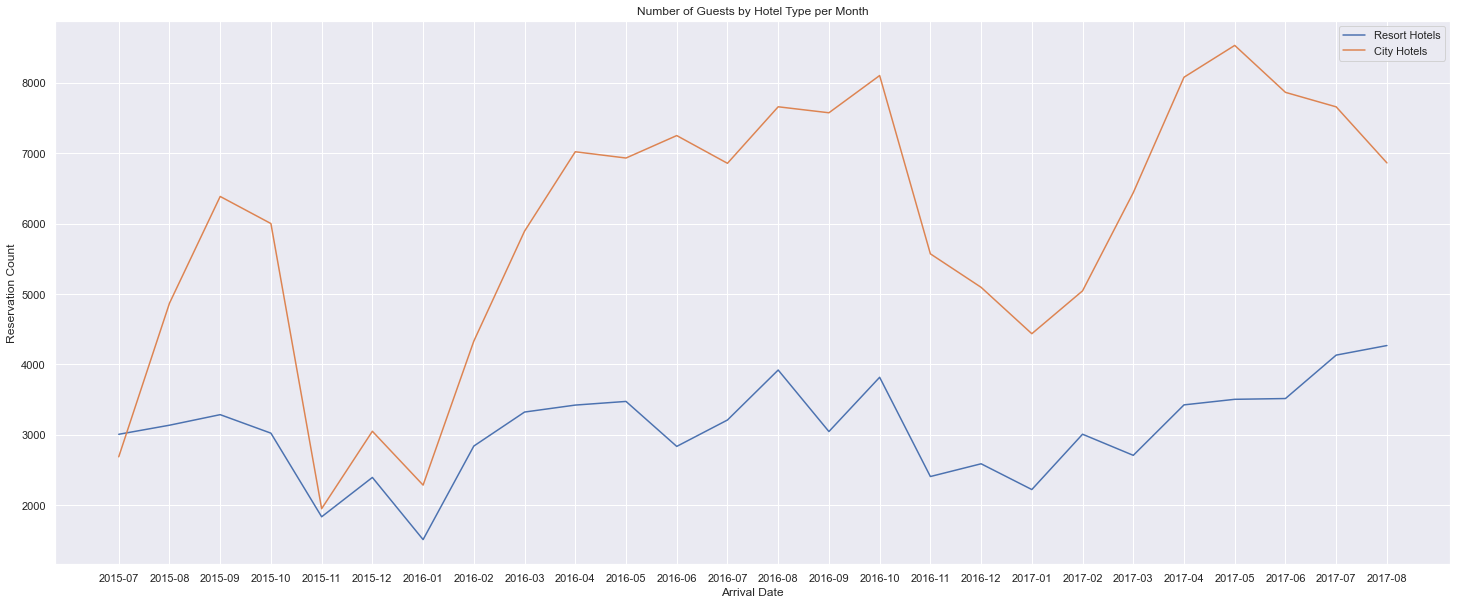

In [26]:
sns.set(rc={'figure.figsize':(25,10)})
fig, ax = plt.subplots()
data_resort = df[df['hotel'] == 'Resort Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0, freq='M')).sum().reset_index()
data_city = df[df['hotel'] == 'City Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0, freq='M')).sum().reset_index() 
date_r = data_resort.arrival_date.dt.to_period('M').value_counts().sort_index().index.astype('str')
data_c = data_city.arrival_date.dt.to_period('M').value_counts().sort_index().index.astype('str')


sns.lineplot(x=date_r, y=data_resort['total_guests'], ax=ax)
sns.lineplot(x=data_c, y= data_city['total_guests'], ax=ax)
ax.set(title='Number of Guests by Hotel Type per Month')
ax.set_ylabel('Reservation Count', fontsize=12);
ax.set_xlabel('Arrival Date', fontsize=12);

plt.legend(labels=["Resort Hotels","City Hotels"]);
plt.savefig("guests_no_by_hotel_month.png", format="png", dpi=720)

plt.show()


### #10. Graph (Subplot)

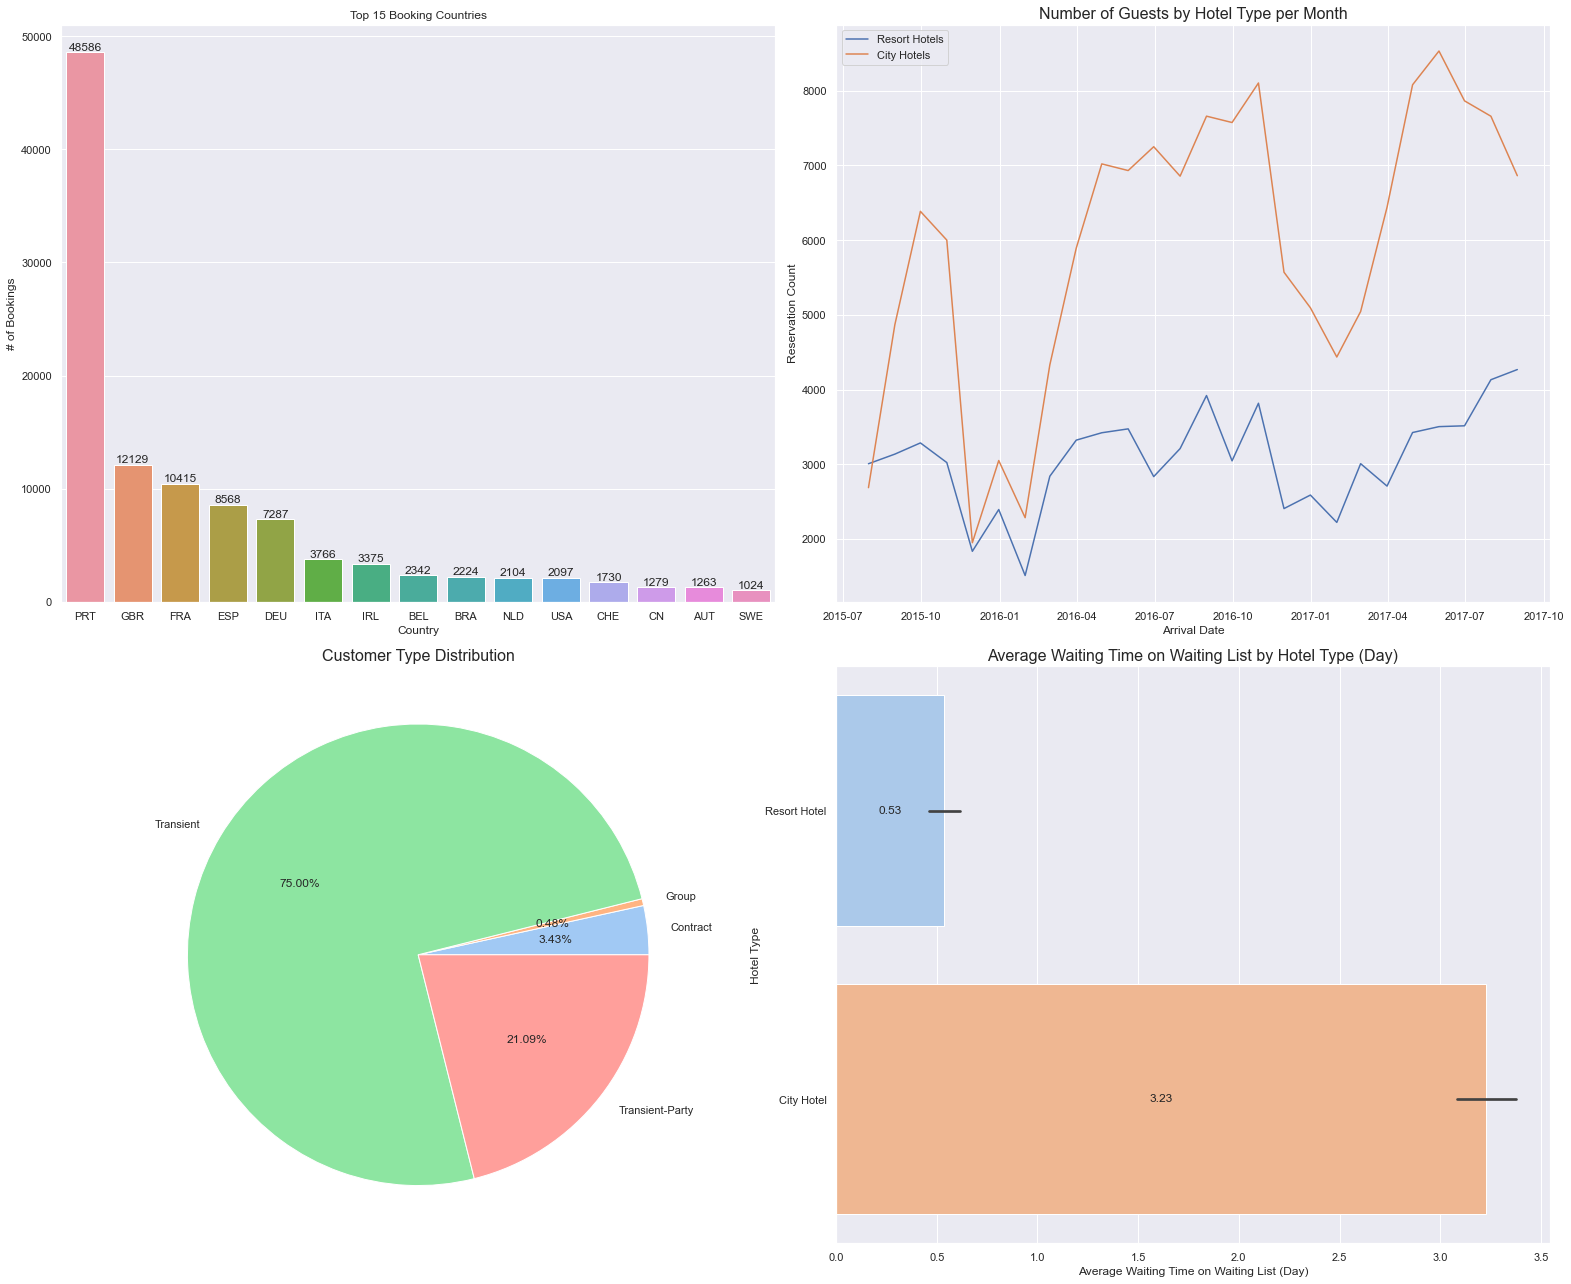

In [27]:
# Create 6 subplots. 3 plots per row and 2 plots per column

plt.figure(figsize=(22,18))

# plot 1:

# Add title
plt.subplot(2, 2, 1) # 2x2 plot with plot position 1 (upper left)

# Add title
plt.title("Top 15 Booking Countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
g = sns.barplot(data= df, x=countries[0:15].index, y=countries[0:15].country)

g.set_xticklabels(countries[0:15]['index'].values)

# Add label for vertical axis
plt.ylabel("# of Bookings")

# Add label for horizontal axis
plt.xlabel("Country")
for container in g.containers:
    g.bar_label(container)

#---------------------------------------

# plot 2:

plt.subplot(2, 2, 2) # 2x2 plot with plot position 2 (upper right)
# Add title

data_resort = df[df['hotel'] == 'Resort Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0, freq='M')).sum().reset_index()
data_city = df[df['hotel'] == 'City Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0, freq='M')).sum().reset_index() 
sns.lineplot(x='arrival_date', y='total_guests', data=data_resort)
sns.lineplot(x='arrival_date', y='total_guests', data=data_city)
plt.title('Number of Guests by Hotel Type per Month', size=16)
plt.ylabel('Reservation Count', fontsize=12)
plt.xlabel('Arrival Date', fontsize=12)
plt.legend(labels=["Resort Hotels","City Hotels"])

#---------------------------------------

# plot 3:

plt.subplot(2,2,3) # position 3 with 2x2 plot

# Add title
plt.title("Customer Type Distribution", size=16)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
data= df.groupby(['customer_type']).size()
labels = data.keys()
# plotting data on chart
plt.pie(data, labels=labels, colors=palette_color, autopct='%.2f%%')


#---------------------------------------

# plot 4:


plt.subplot(2,2,4) # 2x2 plot with plot position 4

# Add title
plt.title("Average Waiting Time on Waiting List by Hotel Type (Day)", size=16)

# Bar chart showing average wokring hours by work class
ax = sns.barplot(x='days_in_waiting_list', y='hotel', data=df, palette=palette_color)

# Add label for vertical and horizantal axis
plt.ylabel("Hotel Type")
plt.xlabel("Average Waiting Time on Waiting List (Day)")
ax.bar_label(ax.containers[0], fmt="%.2f", label_type='center') # needs changing
#---------------------------------------

plt.tight_layout() # To increase space between plots to prevent label overlap
#plt.savefig("subplot_4_graphs.png", format="png", dpi=1200)

plt.show()